Apply Model to some inputs Learn how:

Load a saved Model
Select inputs
Apply Model to inputs (Predict)

Import packages

In [1]:
#numpy: Numeric library
import numpy as np 
#graphics
from matplotlib import pyplot as plt

#tensorflow: use some TF tools
import tensorflow as tf
#Keras: Deep learning API. In TF 2.x, it is included in TF
from tensorflow import keras
#Import Dense layer
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras import Model
#Optimizers: SGD (Stochastic Gradien Descent)
#from tensorflow.keras.optimizers import SGD as sgd

#import data set MNIST
from tensorflow.keras.datasets import mnist

Some verifications

Import MNIST data set
60000 training examples
10000 validation examples
1 example = 28 * 28 matrix (image with 28 * 28 pixels)


In [2]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()


Process & Prepare data
Flattening Input data:
Input data (x_train[i]) should be a vector of real values
- From shape (60000, 28, 28) to shape (60000, 28 * 28)
- Convert to float32 (default is uint8, which python will convert to float64) (flaot 32 will take less memory)

In [3]:
#use numpy reshape
x_train = np.reshape(X_train, (60000, 28 * 28)).astype('float32')
x_valid = np.reshape(X_valid, (10000, 28 * 28)).astype('float32')

Prepare Data (2)
divide by 255, so the values will range from 0 to 1


In [4]:
#print(x_train)
x_train /=  255
x_valid /=  255

Load Model

In [6]:
from tensorflow.keras.models import load_model

#load Model
folder = "logs/crossEntropyReLu2Layers/20200229-202752/"
model = load_model(folder + 'model_all.h5')


Select some inputs

In [19]:
#print(x_train[0])
size = 1000
indexes = np.random.randint(0, y_valid.size-1, size=size)
tf.print("indexes:", indexes)
x = np.array([x_valid[i] for i in indexes])
X = np.array([X_valid[i] for i in indexes])
y = np.array([y_valid[i] for i in indexes])
tf.print(x.shape)
tf.print(y.shape)
# x = np.array([x_train[0], x_train[1], x_train[4566]])
# y = np.array([y_train[0], y_train[1], y_train[4566]])


indexes: array([3399, 2254, 8044, 3086, 3874, 8816, 1860,  116,  241,  200, 4089,
       7550, 9725, 2770, 1363, 6495, 9254, 3513, 1796, 1134,   57, 8900,
       9100,   95, 3094, 1069, 8939, 2272, 7241, 4264, 9240, 9844, 3869,
       9690, 6224, 3541,  217, 2922, 4731, 2777, 6235, 6910, 5981, 1155,
       9231, 4876, 5339, 3737, 2243, 1462, 7058, 2030,  816, 1157, 5236,
       2618, 5784, 5862, 3499, 4510, 7912, 2876, 6724, 9585, 4856, 4550,
       8336, 9428, 6746, 7630, 9781, 2548, 5990, 2191, 1703, 1293, 2487,
       9742, 3687, 9131, 1740, 7998, 4975, 2827, 4052, 2345, 2485, 1959,
       6703, 7785,  217, 9619, 8042,  222, 2551, 7606, 9097, 1241, 2716,
       6166, 3749, 7846, 3734, 5683, 3149, 7957, 6108, 6729,  684, 8659,
       4719,  583, 3221, 9308, 9851,  332,  104, 9487, 8928,  476, 5925,
       2905, 5320, 8751, 4122, 9704, 2393, 5733, 8402, 5529, 4000, 1271,
       7288, 6326, 2818, 5975, 1845, 3448, 4304, 5310, 8663, 4056, 3824,
       9111, 5421, 9651, 1008, 3314, 9618,

Predict

In [20]:
 
#predict
y_predicted = model.predict_classes(x)


Print Prediction results

In [63]:
#print prediction results
#tf.print("y:", y)
#tf.print("predicted classes", y_predicted)

In [21]:
#check if prediction is valid
comparison = y == y_predicted
equal_arrays = comparison.all()

#prints True if All is OK
print(equal_arrays)

#print not predicted indexes
diff = y - y_predicted
 
indexes_false = np.array([i for i in np.arange(diff.size) if diff[i] != 0])
print("Not predicted indexes:", indexes_false)
print("Not predicted y:", [y[i] for i in indexes_false])
print("Not predicted y_predicted:", [y_predicted[i] for i in indexes_false])

False
Not predicted indexes: [ 27  32  42  45  99 108 116 166 246 267 282 305 320 336 379 456 568 593
 600 675 741 765 907]
Not predicted y: [8, 9, 5, 2, 9, 7, 9, 8, 9, 5, 7, 3, 7, 5, 8, 6, 9, 9, 7, 7, 8, 0, 8]
Not predicted y_predicted: [0, 4, 9, 4, 3, 3, 5, 5, 4, 8, 2, 9, 8, 6, 4, 4, 1, 4, 4, 9, 0, 8, 7]


In [22]:
#Accuracy
acc =  1- indexes_false.size/size
print("Accuracy = ", acc)

Accuracy =  0.977


In [23]:
 
np.array(indexes_false)

array([ 27,  32,  42,  45,  99, 108, 116, 166, 246, 267, 282, 305, 320,
       336, 379, 456, 568, 593, 600, 675, 741, 765, 907])

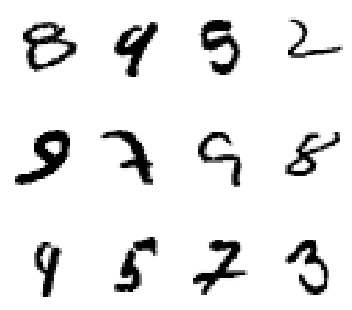

In [24]:
plt.figure(figsize=(5,5))
for k in  np.arange(min(indexes_false.size, 12)):
    plt.subplot(3, 4, k+1)
    plt.imshow(X[indexes_false[k]], cmap="Greys")
    plt.axis('off')
plt.tight_layout()
plt.show()

End